<a href="https://colab.research.google.com/github/AlexBaunti/Prediction_AI/blob/main/DecisionTreesMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Метод решающих деревьев**

# Инициализация библиотек

Подключение необходимых для работы библиотек.




Для работы необходимо подключить библиотеки:


*   numPy
*   pandas
*   Scikit-learn
*   MissingNo
*   SeaBorn
*   MatplotLIB
*   Warnings



In [271]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np # обращение сокращенно np
import pandas as pd # обращение сокращенно pd
import missingno as msno # обращение сокращенно msno
import seaborn as sns # обращение сокращенно sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt # обращение сокращенно plt
%matplotlib inline
from sklearn import tree, svm # алгоритмы sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing  # модуль для кодирования
from sklearn.neural_network import MLPClassifier   # импорт алгоритма для построения простейшей нейронной сети
from sklearn.metrics import make_scorer   # метод, полезный для получения оценок модели при использовании кросс-валидации
from sklearn.metrics import accuracy_score   # метрика общей точности
from sklearn.model_selection import cross_validate   # метод, необходмый для проведения кросс-валидации
from sklearn.model_selection import StratifiedKFold   # алгоритм кросс-валидации
from sklearn.metrics import mean_absolute_error, mean_squared_error # меры качества
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

# Загрузка данных

Получение файлов с данными из GitHub репозитория. 

Получение файлов с данными по ссылке на репозиторий. Данные для обучения и теста передаются в соответствующие переменные. Для чтения Excel-таблиц используется команда "read_excel".  

In [102]:
%%capture
!wget https://raw.githubusercontent.com/AlexBaunti/Prediction_AI/main/COVID_Test_Data.xlsx
!wget https://raw.githubusercontent.com/AlexBaunti/Prediction_AI/main/COVID_Training_Data.xlsx
training_data = pd.read_excel('COVID_Training_Data.xlsx')
test_data = pd.read_excel('COVID_Test_Data.xlsx')

Проверка данных - первые 5 строк таблицы с тренировочными данными

In [103]:
training_data.head()

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,РеакцАдапт,УрРеакт,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,вчСРБ,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо,Class15
0,0,54,2,151,58,25.437481,1.559736,0,0,0,1,2,30,2,0,0,0,2,0,1,2,0,0,0,0,35,35,2,96,145,90,65,110,107,97,70,20.0,20,19,145,4.5,9.40,32,5,27,0,53.0,10.0,0.641304,1.88,0.455645,0.693005,1.134021,46.444954,0.211111,9.354839,РСА,в,4.25,5.35,4.70,0.80,0.88,NaN,NaN,NaN,NaN,3.92,125.0,42.0,41.0,20.0,37.6,0.87,330,120,12.0,3.500000,4.875000,3.90,2,11,300,1
1,0,63,2,165,115,42.240588,2.295830,1,0,0,1,1,60,2,0,0,0,2,0,1,2,0,0,0,0,25,27,2,97,130,80,67,100,108,79,87,50.0,37,29,134,5.0,3.90,35,3,27,0,54.6,7.4,0.464072,1.30,0.849057,0.783176,1.265823,47.987421,0.362500,6.806283,РСА,н,6.50,4.46,6.60,1.20,1.69,NaN,NaN,NaN,NaN,3.80,46.0,102.0,28.0,39.0,27.0,0.98,240,85,6.5,4.631818,4.500000,5.40,2,13,280,1
2,0,50,2,159,46,18.195483,1.425365,0,0,0,1,1,15,2,0,2,2,2,0,1,2,0,0,0,0,20,35,2,98,127,80,64,78,69,84,89,NaN,41,17,124,4.5,8.79,20,1,18,5,70.0,4.0,0.436782,13.79,0.240196,0.519617,0.928571,29.806088,0.212500,6.546392,РСА,в,6.53,3.40,5.48,0.75,3.32,NaN,NaN,NaN,NaN,2.20,90.0,69.0,24.0,13.0,36.0,1.01,248,100,40.0,3.220909,6.306667,4.73,2,12,300,1
3,0,41,2,166,92,33.386558,2.059666,1,0,0,1,2,60,2,0,2,1,2,0,1,2,0,0,0,0,25,40,2,96,135,80,60,115,120,75,87,64.0,75,78,133,4.5,12.00,18,2,5,4,70.0,6.0,0.108491,8.00,1.081250,0.827586,1.533333,38.500000,0.975000,6.081081,РТ,н,6.30,5.00,3.64,0.99,1.13,NaN,NaN,NaN,NaN,5.50,102.0,61.0,25.0,188.0,30.0,0.90,220,125,25.0,2.136364,2.676768,2.65,2,12,300,1
4,0,37,2,161,71,27.390919,1.781931,1,0,0,1,2,30,2,1,1,2,2,0,1,1,0,0,0,0,24,37,2,96,105,70,65,105,100,89,79,38.0,40,39,145,5.3,9.60,31,1,12,3,56.0,9.0,0.323308,12.60,0.735644,0.646831,1.179775,38.926002,0.557143,5.706522,РТ,н,4.30,3.60,4.70,1.00,1.69,NaN,NaN,NaN,NaN,2.70,85.0,64.0,128.0,50.0,34.0,0.96,340,177,12.0,2.931818,3.700000,3.70,2,13,300,1


Считывание размерности таблицы с тренировочными данными

In [104]:
training_data.shape

(64, 84)

Полная таблица данных размерность 64 х 84 успешно передана.

# Анализ набора данных

Получение необходимой информации о данных.

Получим общую информацию о полном наборе данных

In [105]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Пробиотик       64 non-null     int64  
 1   Возраст         64 non-null     int64  
 2   Пол             64 non-null     int64  
 3   Рост            64 non-null     int64  
 4   Вес             64 non-null     int64  
 5   ИМТ             64 non-null     float64
 6   ПлощадьТела     64 non-null     float64
 7   ПредраспССЗ     64 non-null     int64  
 8   Курение         64 non-null     int64  
 9   Алкоголь        64 non-null     int64  
 10  Гиподинамия     64 non-null     int64  
 11  КТ              64 non-null     int64  
 12  ДеньПослеCovid  64 non-null     int64  
 13  СлабостьДо      64 non-null     int64  
 14  БольСердцаДо    64 non-null     int64  
 15  Седцебиение     64 non-null     int64  
 16  ПеребоиДо       64 non-null     int64  
 17  ОдышкаДо        64 non-null     int64

Анализируем результата выполнения команды:

* 64 экземпляра (строки)
* 84 признака (столбцы)

Имеется всего три различных типа данных (dtypes):

* int64 - целое число - 47 столбцов;
* float64 - дробное число - 35 столбцов;
* object - объект (текст) - 2 столбца;


Выведем описательные характеристики набора данных

In [106]:
pd.set_option('display.max_columns', None)
training_data.describe(include = [np.number])

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,вчСРБ,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо,Class15
count,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,63.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,51.000000,51.000000,34.000000,34.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,15.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000
mean,0.484375,56.921875,1.718750,167.03125,80.937500,29.035638,1.927858,0.578125,0.046875,0.062500,0.734375,1.656250,45.312500,1.968750,0.640625,0.750000,0.671875,1.875000,0.343750,0.546875,1.265625,0.125000,0.046875,0.062500,0.234375,20.656250,28.156250,1.890625,97.687500,130.734375,81.406250,73.65625,94.468750,90.546875,94.203125,85.031250,74.888889,74.859375,75.187500,141.187500,4.548438,6.607344,35.171875,3.250000,14.015625,2.968750,49.837500,8.756250,0.272991,5.001281,1.066656,0.614607,1.044505,34.747301,0.923058,5.819934,6.182969,3.550781,5.212500,1.578437,1.397656,67.394118,41.431373,34.450000,73.088235,4.965469,91.573437,67.09875,23.946875,27.595312,33.826563,1.079531,367.218750,169.328125,17.046667,3.174830,2.546198,3.634063,2.500000,12.015625,348.71875,0.578125
std,0.503706,9.292948,0.453163,7.77658,17.141683,6.057935,0.221854,0.497763,0.213042,0.243975,0.445157,0.569565,18.979417,0.533594,0.573687,0.534522,0.564975,0.701472,0.510796,0.532430,0.695614,0.333333,0.213042,0.243975,0.426956,5.839707,7.770965,0.475334,0.774084,14.600763,9.852433,11.75574,16.282203,16.945224,18.749967,20.268021,29.863189,26.150885,37.619598,12.007769,0.331419,1.933264,8.476962,2.600366,7.789884,1.613128,8.939364,2.339304,0.113415,3.726326,0.323349,0.116536,0.272303,8.212217,0.415248,1.383804,1.545402,0.720067,0.958622,0.425845,0.667156,3.556707,2.467832,39.808437,20.461890,1.298045,15.907134,14.69214,17.128533,27.548926,3.295078,0.131166,106.910208,315.460362,12.034644,0.967208,1.195598,0.926543,1.007905,2.081606,57.33900,0.497763
min,0.000000,37.000000,1.000000,151.00000,46.000000,18.195483,1.425365,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,7.000000,1.000000,96.000000,100.000000,60.000000,54.00000,62.000000,52.000000,37.000000,21.000000,20.000000,20.000000,17.000000,118.000000,4.000000,3.100000,18.000000,1.000000,3.000000,0.000000,33.000000,4.000000,0.092652,0.666667,0.240196,0.390789,0.516667,18.805395,0.211111,3.973510,4.250000,1.800000,2.630000,0.750000,0.500000,61.000000,32.000000,15.000000,43.000000,2.200000,46.000000,42.00000,12.000000,8.900000,26.000000,0.870000,160.000000,0.000000,2.000000,1.181818,0.846561,1.300000,1.000000,8.000000,220.00000,0.000000
25%,0.000000,49.750000,1.000000,160.75000,72.500000,24.389150,1.778233,0.000000,0.000000,0.000000,0.000000,1.000000,30.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,

По таблице видно, что в признаке "Ддимеры" при граничном значении 619 максимальное значение равно 2366, что говорит о наличии числовых выбросов - значений признаков, выходящих за их границы.

Теперь проверим набор данных на сбалансированность. Для этого измерим количество значений классов в целевой переменной.

In [107]:
training_data['Class15'].value_counts()

1    37
0    27
Name: Class15, dtype: int64

In [108]:
IR = 37/27 
IR

1.3703703703703705

На основе анализа можно сделать следующие выводы:

*   В некоторых признаках присутствуют значительные пропуски
*   В данных присутствует небольшое количество числовых выбросов
*   Набор данных имеет небольшой дисбаланс (IR = 1.37)




# Кодирование данных

Исходя из анализа данных 2 признака представлены порядковыми данными, работа с которыми вызовет ошибки у некоторых функций. Необходимо их закодировать.

Признаки содержащие порядковые значения - РеакцАдапт и УрРеакт. Выведем их количество значений.

In [109]:
training_data['РеакцАдапт'].value_counts()

РПА       31
РСА       17
РТ         8
РП         5
Стресс     3
Name: РеакцАдапт, dtype: int64

In [110]:
training_data['УрРеакт'].value_counts()

в    32
н    32
Name: УрРеакт, dtype: int64

Для кодирования используется модуль preprocessing из библиотеки sklearn. LabelEncoder составляет словарь имеющихся во входном столбце значений, сортирует значения по алфавиту и присваивает каждому уникальный номер.Создадим отдельную переменную с закодированными данными, а в метод передадим нужные столбцы.

In [111]:
training_data_encoding = training_data.copy (deep=True)
coding = preprocessing.LabelEncoder() 
training_data_encoding['РеакцАдапт']= coding.fit_transform(training_data_encoding['РеакцАдапт'])
training_data_encoding['УрРеакт']= coding.fit_transform(training_data_encoding['УрРеакт'])

Проверим успешность кодирования данных.

In [112]:
training_data_encoding['РеакцАдапт'].value_counts()

1    31
2    17
3     8
0     5
4     3
Name: РеакцАдапт, dtype: int64

In [113]:
training_data_encoding['УрРеакт'].value_counts()

0    32
1    32
Name: УрРеакт, dtype: int64

# Обработка выбросов

При анализе набора данных были замечены аномально далёкие значения от остальных образцов своих классов. Необходимо обработать их.

Набор данных был вручную проанализирован с помощью описательной таблицы:


*   При кодировании установлено, что все текстовые значения заполнены корректно
*   Все бинарные и целые значения также заполнены корректно и совпадают с границами, установленными в задании.
*   Среди дробных значений в признаке "Ддимеры" замечены числовые выбросы.

Обработаем числовые выбросы в признаке Ддимеры. Выведем информацию по признаку.



In [114]:
training_data_encoding['Ддимеры'].describe()

count      64.000000
mean      169.328125
std       315.460362
min         0.000000
25%         0.000000
50%       106.500000
75%       217.250000
max      2366.000000
Name: Ддимеры, dtype: float64

Признак не содержит пропусков. Напишем функцию определения выбросов и зададим границы.

In [115]:
def outlier_boundary_search(data, feature, low, up):
    outliers = pd.concat([data[feature]<low, data[feature]>up],axis=1)   # условие, при котором значение признака считаем выбросом
    outliers_index = outliers.any(axis=1)
    print('Количество вероятных выбросов в признаке:',outliers_index.value_counts()[1])
    print('Доля выбросов:', round(outliers_index.value_counts()[1]/len(outliers_index), 3))    
    return outliers_index

In [116]:
training_data_outliner = training_data_encoding.copy (deep=True)
indexes_of_outliers = outlier_boundary_search(training_data_outliner, 'Ддимеры', 0, 619)

Количество вероятных выбросов в признаке: 1
Доля выбросов: 0.016


In [117]:
training_data_outliner.loc[indexes_of_outliers,'Ддимеры']

39    2366
Name: Ддимеры, dtype: int64

In [118]:
training_data_outliner['Ддимеры'].values[39] = training_data_encoding['Ддимеры'].values[39]/10
training_data_outliner['Ддимеры'].describe()

count     64.000000
mean     136.046875
std      147.876442
min        0.000000
25%        0.000000
50%      106.500000
75%      216.500000
max      619.000000
Name: Ддимеры, dtype: float64

# Обработка пропусков в данных

По полученной информации о данных следует, что в них имеются пропуски. Такой набор данных не может быть корректно обработан, необходимо избавиться от пропусков.


Столбчатая диаграмма из библиотеки missingno позволяет увидеть разницу в количестве непустых экземпляров разных признаков. Слева указаны названия признаков, справа - количество заполненных значений в признаке, сверху - доля заполненных значений.

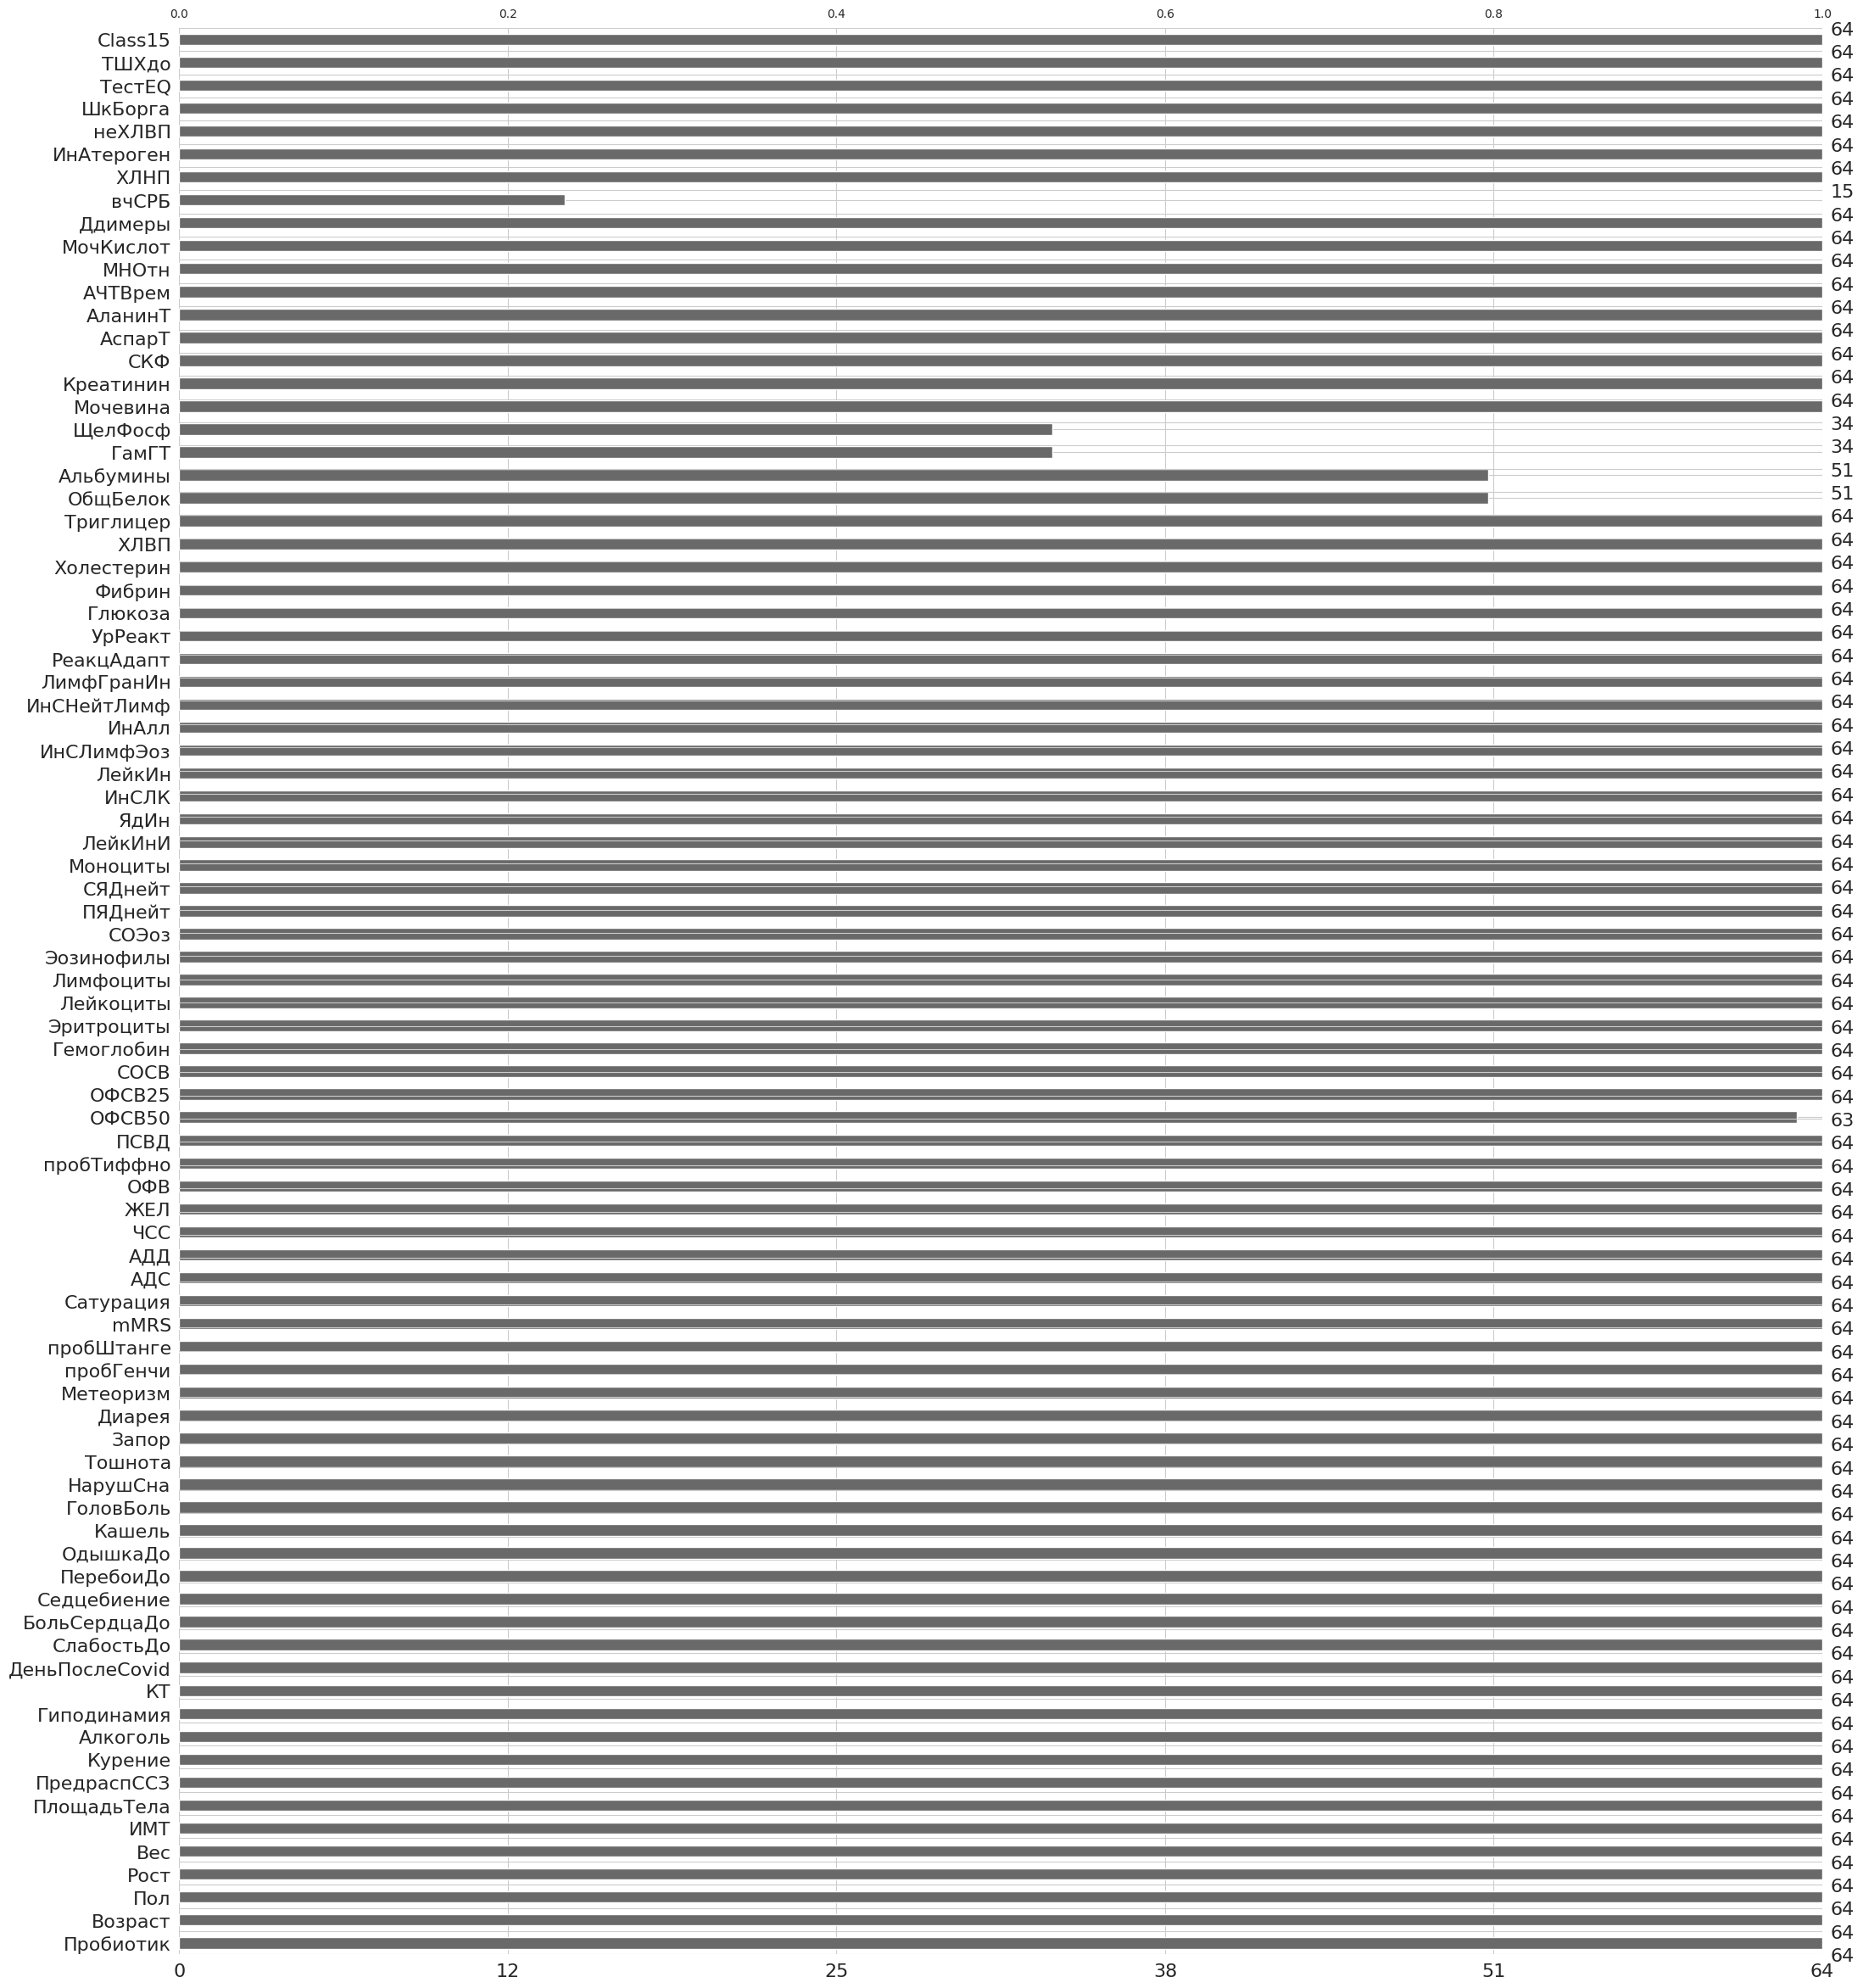

In [119]:
msno.bar(training_data_outliner);

Матрица пропусков, вызываемая функцией matrix, показывает распределение пропусков по экземплярам.

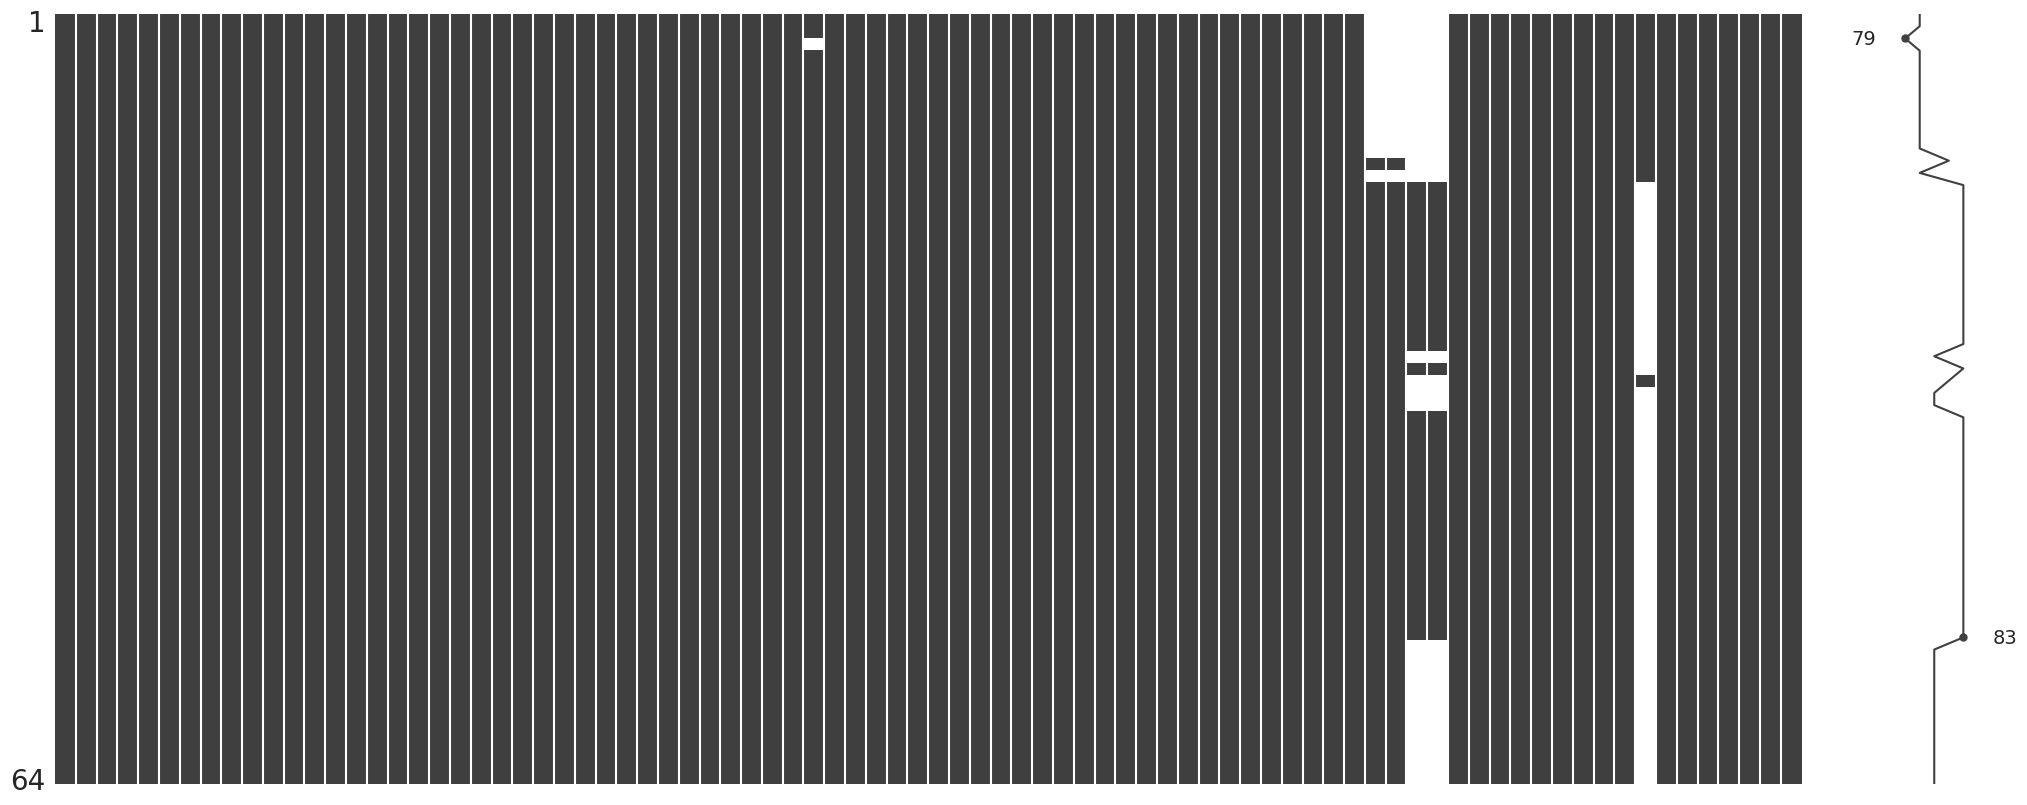

In [120]:
msno.matrix(training_data_outliner);

Из анализа пропусков следует, что 6 признаков заполнены не полностью


*   вчСРБ (15 из 64)
*   ЩелФосф (34 из 64)
*   ГамГТ (34 из 64)
*   Альбумины (51 из 64)
*   ОбщБелок (51 из 64)
*   ОФСВ50 (63 из 64)

Так как признак "вчСРБ" заполнен лишь на 23,4% и содержит непригодные для обучения данные, его можно удалить.



In [121]:
training_data_missing_fix = training_data_outliner.drop('вчСРБ', axis=1)
training_data_missing_fix

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,РеакцАдапт,УрРеакт,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо,Class15
0,0,54,2,151,58,25.437481,1.559736,0,0,0,1,2,30,2,0,0,0,2,0,1,2,0,0,0,0,35,35,2,96,145,90,65,110,107,97,70,20.0,20,19,145,4.5,9.40,32,5,27,0,53.0,10.0,0.641304,1.880000,0.455645,0.693005,1.134021,46.444954,0.211111,9.354839,2,0,4.25,5.35,4.70,0.80,0.88,NaN,NaN,NaN,NaN,3.92,125.0,42.0,41.0,20.0,37.6,0.87,330,120,3.500000,4.875000,3.90,2,11,300,1
1,0,63,2,165,115,42.240588,2.295830,1,0,0,1,1,60,2,0,0,0,2,0,1,2,0,0,0,0,25,27,2,97,130,80,67,100,108,79,87,50.0,37,29,134,5.0,3.90,35,3,27,0,54.6,7.4,0.464072,1.300000,0.849057,0.783176,1.265823,47.987421,0.362500,6.806283,2,1,6.50,4.46,6.60,1.20,1.69,NaN,NaN,NaN,NaN,3.80,46.0,102.0,28.0,39.0,27.0,0.98,240,85,4.631818,4.500000,5.40,2,13,280,1
2,0,50,2,159,46,18.195483,1.425365,0,0,0,1,1,15,2,0,2,2,2,0,1,2,0,0,0,0,20,35,2,98,127,80,64,78,69,84,89,NaN,41,17,124,4.5,8.79,20,1,18,5,70.0,4.0,0.436782,13.790000,0.240196,0.519617,0.928571,29.806088,0.212500,6.546392,2,0,6.53,3.40,5.48,0.75,3.32,NaN,NaN,NaN,NaN,2.20,90.0,69.0,24.0,13.0,36.0,1.01,248,100,3.220909,6.306667,4.73,2,12,300,1
3,0,41,2,166,92,33.386558,2.059666,1,0,0,1,2,60,2,0,2,1,2,0,1,2,0,0,0,0,25,40,2,96,135,80,60,115,120,75,87,64.0,75,78,133,4.5,12.00,18,2,5,4,70.0,6.0,0.108491,8.000000,1.081250,0.827586,1.533333,38.500000,0.975000,6.081081,3,1,6.30,5.00,3.64,0.99,1.13,NaN,NaN,NaN,NaN,5.50,102.0,61.0,25.0,188.0,30.0,0.90,220,125,2.136364,2.676768,2.65,2,12,300,1
4,0,37,2,161,71,27.390919,1.781931,1,0,0,1,2,30,2,1,1,2,2,0,1,1,0,0,0,0,24,37,2,96,105,70,65,105,100,89,79,38.0,40,39,145,5.3,9.60,31,1,12,3,56.0,9.0,0.323308,12.600000,0.735644,0.646831,1.179775,38.926002,0.557143,5.706522,3,1,4.30,3.60,4.70,1.00,1.69,NaN,NaN,NaN,NaN,2.70,85.0,64.0,128.0,50.0,34.0,0.96,340,177,2.931818,3.700000,3.70,2,13,300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,62,2,165,85,31.221304,1.973787,1,0,0,1,2,30,2,1,1,1,2,0,1,1,0,0,0,1,15,20,2,98,145,90,78,104,111,116,81,129.0,91,135,130,4.8,8.80,40,3,9,3,46.0,8.0,0.158065,3.933333,1.390400,0.799712,0.896552,42.889469,1.500000,5.800000,1,0,8.10,4.90,5.73,1.87,2.14,66.4,43.0,NaN,NaN,5.31,86.0,63.0,35.0,55.0,36.0,1.00,370,0,4.150000,2.064171,3.86,3,15,360,1
60,1,59,2,167,102,36.573559,2.175239,1,0,0,0,2,60,2,1,1,1,2,0,2,2,0,0,0,1,14,23,2,97,152,87,78,101,93,101,94,66.0,99,57,138,4.6,9.30,52,1,24,2,35.0,10.0,0.481013,11.300000,0.980800,0.631365,1.000000,33.585059,0.655172,5.608856,0,1,5.74,4.50,5.51,1.93,0.67,68.7,40.0,NaN,NaN,4.44,99.5,54.0,20.0,23.0,38.0,1.28,354,0,3.450000,1.854922,3.58,3,15,400,0
61,1,58,1,168,91,32.242063,2.060744,0,0,0,0,2,30,2,1,1,1,2,1,1,1,0,0,0,1,15,28,2,98,138,80,89,85,100,115,111,65.0,116,114,158,5.0,4.70,35,3,3,4,49.0,9.0,0.166667,2.900000,0.889831,0.614628,0.739130,35.877287,1.425000,4.367089,1,0,6.10,2.80,5.27,1.59,1.20,66.0,41.0,NaN,NaN,5.77,115.0,59.7,16.0,19.0,36.0,1.25,399,0,3.760000,2.314465,3.68,3,15,400,1
62,1,60,2,156,52,21.367521,1.501111,0,0,0,0,2,20,2,1,1,1,2,1,0,2,0,0,0,0,12,23,2,99,135,90,78,116,118,110,87,112.0,96,103,132,4.3,3.10,30,2,8,5,51.0,12.0,0.142857,4.050000,1.239831,0.873427,1.054545,45.313717,1.14

In [122]:
training_data_missing_fix.shape

(64, 83)

Данные в остальных столбцах являются ценными наборами для обучения, поэтому пропуски в них можно заполнить средним арифметическим/медианой. Для выбора более точного метода используем классификатор точности. Также для заполнения пропусков с большей корректностью данные будут сгруппированы.

**Заполнение средним арифметическим**

Сгруппируем данные по значениям класса.

In [123]:
training_data_no_miss = training_data_missing_fix.copy(deep=True)
training_data_group = training_data_no_miss.groupby(['Class15'])
training_data_no_miss = training_data_group.apply(lambda x: x.fillna(x.mean()))

Построим гистограмму по признаку ГамГТ, так как в нём примерно половина пропусков.

<Axes: xlabel='ГамГТ', ylabel='Count'>

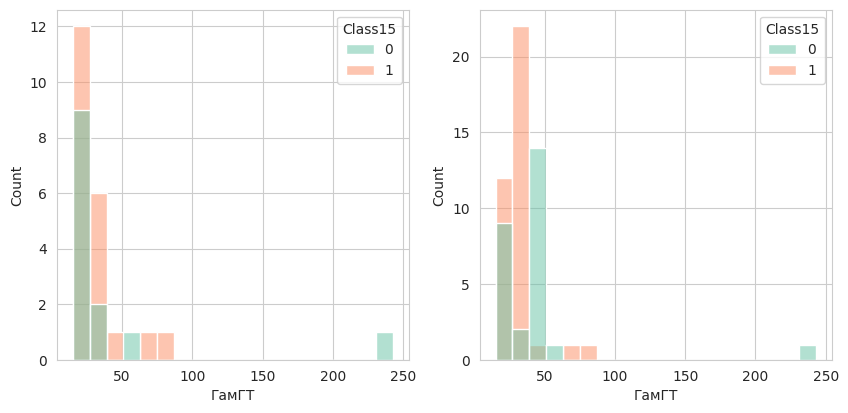

In [124]:
figure = plt.figure(figsize=(10,10))
ax_1 = figure.add_subplot(2,2,1)
sns.histplot(data=training_data_missing_fix, x='ГамГТ', binwidth=12, hue="Class15", palette='Set2')
ax_2 = figure.add_subplot(2,2,2)
sns.histplot(data=training_data_no_miss, x='ГамГТ', binwidth=12, hue="Class15", palette='Set2')

Теперь на гистограмме признака ГамГТ можно обнаружить два пика разного цвета. Проверим точность этого метода заполнения пропусков с помощью классификатора.

In [125]:
training_data_no_miss_y = training_data_no_miss['Class15']   
training_data_no_miss_X = training_data_no_miss.drop('Class15', 1)   
scoring = {'accuracy': make_scorer(accuracy_score)}  
mlp = MLPClassifier(solver='lbfgs', random_state=0)    
result = cross_validate(estimator=mlp.fit(training_data_no_miss_X, training_data_no_miss_y),
                            X=training_data_no_miss_X, y=training_data_no_miss_y,
                            scoring=scoring, cv=StratifiedKFold(5), n_jobs=-1,
                            return_train_score=False)
print('Точность классификатора = {}%'.format(round(100 * np.mean(result['test_accuracy']), 2)))

Точность классификатора = 65.64%


In [126]:
training_data_no_miss

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,РеакцАдапт,УрРеакт,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо,Class15
0,0,54,2,151,58,25.437481,1.559736,0,0,0,1,2,30,2,0,0,0,2,0,1,2,0,0,0,0,35,35,2,96,145,90,65,110,107,97,70,20.000000,20,19,145,4.5,9.40,32,5,27,0,53.0,10.0,0.641304,1.880000,0.455645,0.693005,1.134021,46.444954,0.211111,9.354839,2,0,4.25,5.35,4.70,0.80,0.88,66.714815,41.185185,29.838095,71.000000,3.92,125.0,42.0,41.0,20.0,37.6,0.87,330,120,3.500000,4.875000,3.90,2,11,300,1
1,0,63,2,165,115,42.240588,2.295830,1,0,0,1,1,60,2,0,0,0,2,0,1,2,0,0,0,0,25,27,2,97,130,80,67,100,108,79,87,50.000000,37,29,134,5.0,3.90,35,3,27,0,54.6,7.4,0.464072,1.300000,0.849057,0.783176,1.265823,47.987421,0.362500,6.806283,2,1,6.50,4.46,6.60,1.20,1.69,66.714815,41.185185,29.838095,71.000000,3.80,46.0,102.0,28.0,39.0,27.0,0.98,240,85,4.631818,4.500000,5.40,2,13,280,1
2,0,50,2,159,46,18.195483,1.425365,0,0,0,1,1,15,2,0,2,2,2,0,1,2,0,0,0,0,20,35,2,98,127,80,64,78,69,84,89,75.388889,41,17,124,4.5,8.79,20,1,18,5,70.0,4.0,0.436782,13.790000,0.240196,0.519617,0.928571,29.806088,0.212500,6.546392,2,0,6.53,3.40,5.48,0.75,3.32,66.714815,41.185185,29.838095,71.000000,2.20,90.0,69.0,24.0,13.0,36.0,1.01,248,100,3.220909,6.306667,4.73,2,12,300,1
3,0,41,2,166,92,33.386558,2.059666,1,0,0,1,2,60,2,0,2,1,2,0,1,2,0,0,0,0,25,40,2,96,135,80,60,115,120,75,87,64.000000,75,78,133,4.5,12.00,18,2,5,4,70.0,6.0,0.108491,8.000000,1.081250,0.827586,1.533333,38.500000,0.975000,6.081081,3,1,6.30,5.00,3.64,0.99,1.13,66.714815,41.185185,29.838095,71.000000,5.50,102.0,61.0,25.0,188.0,30.0,0.90,220,125,2.136364,2.676768,2.65,2,12,300,1
4,0,37,2,161,71,27.390919,1.781931,1,0,0,1,2,30,2,1,1,2,2,0,1,1,0,0,0,0,24,37,2,96,105,70,65,105,100,89,79,38.000000,40,39,145,5.3,9.60,31,1,12,3,56.0,9.0,0.323308,12.600000,0.735644,0.646831,1.179775,38.926002,0.557143,5.706522,3,1,4.30,3.60,4.70,1.00,1.69,66.714815,41.185185,29.838095,71.000000,2.70,85.0,64.0,128.0,50.0,34.0,0.96,340,177,2.931818,3.700000,3.70,2,13,300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,62,2,165,85,31.221304,1.973787,1,0,0,1,2,30,2,1,1,1,2,0,1,1,0,0,0,1,15,20,2,98,145,90,78,104,111,116,81,129.000000,91,135,130,4.8,8.80,40,3,9,3,46.0,8.0,0.158065,3.933333,1.390400,0.799712,0.896552,42.889469,1.500000,5.800000,1,0,8.10,4.90,5.73,1.87,2.14,66.400000,43.000000,29.838095,71.000000,5.31,86.0,63.0,35.0,55.0,36.0,1.00,370,0,4.150000,2.064171,3.86,3,15,360,1
60,1,59,2,167,102,36.573559,2.175239,1,0,0,0,2,60,2,1,1,1,2,0,2,2,0,0,0,1,14,23,2,97,152,87,78,101,93,101,94,66.000000,99,57,138,4.6,9.30,52,1,24,2,35.0,10.0,0.481013,11.300000,0.980800,0.631365,1.000000,33.585059,0.655172,5.608856,0,1,5.74,4.50,5.51,1.93,0.67,68.700000,40.000000,41.900000,76.461538,4.44,99.5,54.0,20.0,23.0,38.0,1.28,354,0,3.450000,1.854922,3.58,3,15,400,0
61,1,58,1,168,91,32.242063,2.060744,0,0,0,0,2,30,2,1,1,1,2,1,1,1,0,0,0,1,15,28,2,98,138,80,89,85,100,115,111,65.000000,116,114,158,5.0,4.70,35,3,3,4,49.0,9.0,0.166667,2.900000,0.889831,0.614628,0.739130,35.877287,1.425000,4.367089,1,0,6.10,2.80,5.27,1.59,1.20,66.000000,41.000000,29.838095,71.000000,5.77,115.0,59.7,16.0,19.0,36.0,1.25,399,0,3.760000,2.314465,3.

**Заполнение медианой**

In [127]:
# training_data_no_miss = training_data_missing_fix.copy(deep=True)
# training_data_no_miss = training_data_no_miss.fillna(training_data_no_miss.median())

<Axes: xlabel='ГамГТ', ylabel='Count'>

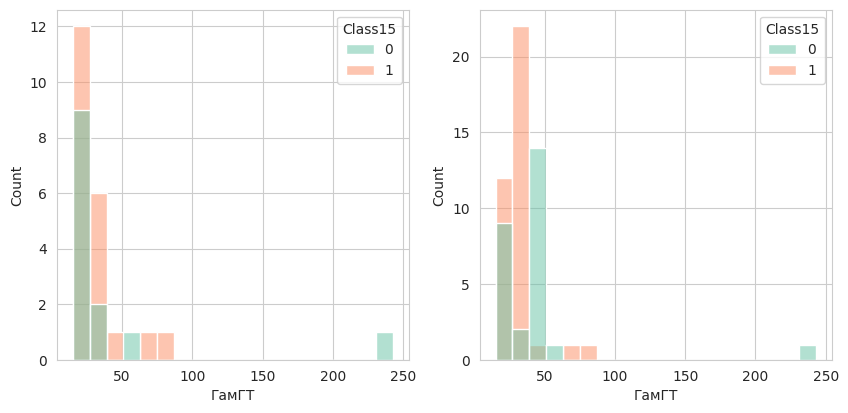

In [128]:
figure = plt.figure(figsize=(10,10))
ax_1 = figure.add_subplot(2,2,1)
sns.histplot(data=training_data_missing_fix, x='ГамГТ', binwidth=12, hue="Class15", palette='Set2')
ax_2 = figure.add_subplot(2,2,2)
sns.histplot(data=training_data_no_miss, x='ГамГТ', binwidth=12, hue="Class15", palette='Set2')

In [129]:
training_data_no_miss_y = training_data_no_miss['Class15']   
training_data_no_miss_X = training_data_no_miss.drop('Class15', 1)   
scoring = {'accuracy': make_scorer(accuracy_score)}  
mlp = MLPClassifier(solver='lbfgs', random_state=0)    
result = cross_validate(estimator=mlp.fit(training_data_no_miss_X, training_data_no_miss_y),
                            X=training_data_no_miss_X, y=training_data_no_miss_y,
                            scoring=scoring, cv=StratifiedKFold(5), n_jobs=-1,
                            return_train_score=False)
print('Точность классификатора = {}%'.format(round(100 * np.mean(result['test_accuracy']), 2)))

Точность классификатора = 65.64%


# Разделение входных данных и выходной переменных

Передача частей данных в отдельные переменные

Необходимо спрогнозировать эффективность выздоровление пациента, поэтому выходная переменная - это Class15. Запишем название столбца таблицы, в котором содержится целевая функция, в переменную target_variable:

In [213]:
target_variable = 'Class15'

Теперь выделим в отдельную переменную training_target_variable весь столбец со значениями целевой переменной и проверим корректность присвоенных данных.

In [214]:
training_target_variable = training_data_no_miss[target_variable]
training_target_variable.info()

<class 'pandas.core.series.Series'>
Int64Index: 64 entries, 0 to 63
Series name: Class15
Non-Null Count  Dtype
--------------  -----
64 non-null     int64
dtypes: int64(1)
memory usage: 3.1 KB


В отдельную переменную training_samples запишем признаки - то есть всю обучающую таблицу, за исключением целевой переменной. Для этого вызовем у переменной training_data метод drop() и удалим столбец "Class15".

In [215]:
training_samples = training_data_no_miss.drop(target_variable, axis=1)

Проверим, что столбец действительно удалён с помощью методов *head* и *shape*.

In [256]:
training_samples.head()

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,РеакцАдапт,УрРеакт,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо
0,0,54,2,151,58,25.437481,1.559736,0,0,0,1,2,30,2,0,0,0,2,0,1,2,0,0,0,0,35,35,2,96,145,90,65,110,107,97,70,20.000000,20,19,145,4.5,9.40,32,5,27,0,53.0,10.0,0.641304,1.88,0.455645,0.693005,1.134021,46.444954,0.211111,9.354839,2,0,4.25,5.35,4.70,0.80,0.88,66.714815,41.185185,29.838095,71.0,3.92,125.0,42.0,41.0,20.0,37.6,0.87,330,120,3.500000,4.875000,3.90,2,11,300
1,0,63,2,165,115,42.240588,2.295830,1,0,0,1,1,60,2,0,0,0,2,0,1,2,0,0,0,0,25,27,2,97,130,80,67,100,108,79,87,50.000000,37,29,134,5.0,3.90,35,3,27,0,54.6,7.4,0.464072,1.30,0.849057,0.783176,1.265823,47.987421,0.362500,6.806283,2,1,6.50,4.46,6.60,1.20,1.69,66.714815,41.185185,29.838095,71.0,3.80,46.0,102.0,28.0,39.0,27.0,0.98,240,85,4.631818,4.500000,5.40,2,13,280
2,0,50,2,159,46,18.195483,1.425365,0,0,0,1,1,15,2,0,2,2,2,0,1,2,0,0,0,0,20,35,2,98,127,80,64,78,69,84,89,75.388889,41,17,124,4.5,8.79,20,1,18,5,70.0,4.0,0.436782,13.79,0.240196,0.519617,0.928571,29.806088,0.212500,6.546392,2,0,6.53,3.40,5.48,0.75,3.32,66.714815,41.185185,29.838095,71.0,2.20,90.0,69.0,24.0,13.0,36.0,1.01,248,100,3.220909,6.306667,4.73,2,12,300
3,0,41,2,166,92,33.386558,2.059666,1,0,0,1,2,60,2,0,2,1,2,0,1,2,0,0,0,0,25,40,2,96,135,80,60,115,120,75,87,64.000000,75,78,133,4.5,12.00,18,2,5,4,70.0,6.0,0.108491,8.00,1.081250,0.827586,1.533333,38.500000,0.975000,6.081081,3,1,6.30,5.00,3.64,0.99,1.13,66.714815,41.185185,29.838095,71.0,5.50,102.0,61.0,25.0,188.0,30.0,0.90,220,125,2.136364,2.676768,2.65,2,12,300
4,0,37,2,161,71,27.390919,1.781931,1,0,0,1,2,30,2,1,1,2,2,0,1,1,0,0,0,0,24,37,2,96,105,70,65,105,100,89,79,38.000000,40,39,145,5.3,9.60,31,1,12,3,56.0,9.0,0.323308,12.60,0.735644,0.646831,1.179775,38.926002,0.557143,5.706522,3,1,4.30,3.60,4.70,1.00,1.69,66.714815,41.185185,29.838095,71.0,2.70,85.0,64.0,128.0,50.0,34.0,0.96,340,177,2.931818,3.700000,3.70,2,13,300


In [217]:
training_samples.shape

(64, 82)

In [257]:
training_data_no_miss_y = training_target_variable 
training_data_no_miss_X = training_samples
scoring = {'accuracy': make_scorer(accuracy_score)}  
mlp = MLPClassifier(solver='lbfgs', random_state=0)    
result = cross_validate(estimator=mlp.fit(training_data_no_miss_X, training_data_no_miss_y),
                            X=training_data_no_miss_X, y=training_data_no_miss_y,
                            scoring=scoring, cv=StratifiedKFold(5), n_jobs=-1,
                            return_train_score=False)
print('Точность классификатора = {}%'.format(round(100 * np.mean(result['test_accuracy']), 2)))

Точность классификатора = 65.64%


Также проверим есть ли в данных дубликаты

In [219]:
duplicateRows = training_samples[training_samples.duplicated ()]
duplicateRows

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,РеакцАдапт,УрРеакт,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо


Дубликатов в данных нет. Можно приступать к нормализации

# Нормализация данных

Алгоритмы машинного обучения работают лучше и сходятся быстрее, когда переменные имеют меньший масштаб. Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.



Используем модуль preprocessing из библиотеки Sklearn. Применим мини-максную нормализацию к обучающей таблице.

In [262]:
transformer = preprocessing.MinMaxScaler(feature_range=(0, 1))
transformer.fit(training_samples)
names = training_samples.columns
training_samples_norm = transformer.transform(training_samples) 
training_samples_norm = pd.DataFrame(training_samples_norm, columns=names)
training_samples_norm

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,РеакцАдапт,УрРеакт,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо
0,0.0,0.485714,1.0,0.000000,0.141176,0.270968,0.123173,0.0,0.0,0.0,1.0,0.5,0.4,0.666667,0.0,0.0,0.0,0.666667,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.00,0.651163,0.5,0.000000,0.692308,0.750,0.154930,0.539326,0.774648,0.625000,0.480392,0.000000,0.000000,0.009302,0.54,0.384615,0.707865,0.341463,0.363636,0.648649,0.000000,0.540541,0.545455,1.000000,0.092456,0.105775,0.626176,0.434992,0.537371,0.000000,0.804594,0.50,0.0,0.000000,0.986111,0.460000,0.028902,0.134752,0.314001,0.656085,0.065079,0.297872,0.267081,1.000000,0.000000,0.250000,0.061977,0.682353,0.000000,0.356394,0.193861,0.491329,0.737795,0.582960,0.2,0.375,0.333333
1,0.0,0.742857,1.0,0.451613,0.811765,0.899676,0.797921,1.0,0.0,0.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.666667,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.60,0.465116,0.5,0.333333,0.461538,0.500,0.183099,0.426966,0.788732,0.437500,0.647059,0.227273,0.150442,0.055814,0.32,0.769231,0.089888,0.414634,0.181818,0.648649,0.000000,0.583784,0.309091,0.676968,0.048260,0.298922,0.813005,0.527861,0.567360,0.071786,0.423544,0.50,1.0,0.257143,0.738889,0.882222,0.260116,0.421986,0.314001,0.656085,0.065079,0.297872,0.248447,0.000000,1.000000,0.137931,0.168063,0.058824,0.152778,0.167715,0.137318,0.731214,0.669115,0.919283,0.2,0.625,0.250000
2,0.0,0.371429,1.0,0.258065,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.1,0.666667,0.0,1.0,1.0,0.666667,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.40,0.651163,0.5,0.666667,0.415385,0.500,0.140845,0.179775,0.239437,0.489583,0.666667,0.419613,0.185841,0.000000,0.12,0.384615,0.639326,0.048780,0.000000,0.405405,0.714286,1.000000,0.000000,0.627227,1.000000,0.000000,0.266926,0.290231,0.213877,0.000659,0.384687,0.50,0.0,0.260571,0.444444,0.633333,0.000000,1.000000,0.314001,0.656085,0.065079,0.297872,0.000000,0.556962,0.450000,0.103448,0.022892,0.588235,0.194444,0.184486,0.161551,0.432177,1.000000,0.769058,0.2,0.500,0.333333
3,0.0,0.114286,1.0,0.483871,0.541176,0.568392,0.581439,1.0,0.0,0.0,1.0,0.5,1.0,0.666667,0.0,1.0,0.5,0.666667,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.60,0.767442,0.5,0.000000,0.538462,0.500,0.084507,0.595506,0.957746,0.395833,0.647059,0.333333,0.486726,0.283721,0.30,0.384615,1.000000,0.000000,0.090909,0.054054,0.571429,1.000000,0.181818,0.028869,0.558801,0.412918,0.905020,0.716350,0.382905,0.362223,0.315115,0.75,1.0,0.234286,0.888889,0.224444,0.138728,0.223404,0.314001,0.656085,0.065079,0.297872,0.512422,0.708861,0.316667,0.112069,1.000000,0.235294,0.041667,0.125786,0.201939,0.202312,0.335196,0.302691,0.2,0.500,0.333333
4,0.0,0.000000,1.0,0.322581,0.294118,0.344058,0.326850,1.0,0.0,0.0,1.0,0.5,0.4,0.666667,0.5,0.5,1.0,0.666667,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.56,0.697674,0.5,0.000000,0.076923,0.250,0.154930,0.483146,0.676056,0.541667,0.568627,0.136364,0.176991,0.102326,0.54,1.000000,0.730337,0.317073,0.000000,0.243243,0.428571,0.621622,0.454545,0.420405,0.909322,0.243242,0.530505,0.467231,0.391187,0.164082,0.259113,0.75,1.0,0.005714,0.500000,0.460000,0.144509,0.421986,0.314001,0.656085,0.065079,0.297872,0.077640,0.493671,0.366667,1.000000,0.229481,0.470588,0.125000,0.377358,0.285945,0.370906,0.522598,0.538117,0.2,0.625,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Данные нормализованы в диапазоне от 0 до 1. Можно приступать к выделению главных компоннент и фильтрации признаков.

# Отбор признаков

Отбор признаков – это процесс выбора признаков, имеющих наиболее тесные взаимосвязи с целевой переменной. Присутствие в данных неинформативных признаков приводит к снижению точности многих моделей, особенно линейных.


In [263]:
training_samples_before_selection_x = training_samples_norm.copy(deep=True)
training_samples_before_selection_y = training_target_variable.copy (deep=True)
training_samples_before_selection_x.head(5)

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,РеакцАдапт,УрРеакт,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо
0,0.0,0.485714,1.0,0.000000,0.141176,0.270968,0.123173,0.0,0.0,0.0,1.0,0.5,0.4,0.666667,0.0,0.0,0.0,0.666667,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.00,0.651163,0.5,0.000000,0.692308,0.75,0.154930,0.539326,0.774648,0.625000,0.480392,0.000000,0.000000,0.009302,0.54,0.384615,0.707865,0.341463,0.363636,0.648649,0.000000,0.540541,0.545455,1.000000,0.092456,0.105775,0.626176,0.434992,0.537371,0.000000,0.804594,0.50,0.0,0.000000,0.986111,0.460000,0.028902,0.134752,0.314001,0.656085,0.065079,0.297872,0.267081,1.000000,0.000000,0.250000,0.061977,0.682353,0.000000,0.356394,0.193861,0.491329,0.737795,0.582960,0.2,0.375,0.333333
1,0.0,0.742857,1.0,0.451613,0.811765,0.899676,0.797921,1.0,0.0,0.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.666667,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.60,0.465116,0.5,0.333333,0.461538,0.50,0.183099,0.426966,0.788732,0.437500,0.647059,0.227273,0.150442,0.055814,0.32,0.769231,0.089888,0.414634,0.181818,0.648649,0.000000,0.583784,0.309091,0.676968,0.048260,0.298922,0.813005,0.527861,0.567360,0.071786,0.423544,0.50,1.0,0.257143,0.738889,0.882222,0.260116,0.421986,0.314001,0.656085,0.065079,0.297872,0.248447,0.000000,1.000000,0.137931,0.168063,0.058824,0.152778,0.167715,0.137318,0.731214,0.669115,0.919283,0.2,0.625,0.250000
2,0.0,0.371429,1.0,0.258065,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.1,0.666667,0.0,1.0,1.0,0.666667,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.40,0.651163,0.5,0.666667,0.415385,0.50,0.140845,0.179775,0.239437,0.489583,0.666667,0.419613,0.185841,0.000000,0.12,0.384615,0.639326,0.048780,0.000000,0.405405,0.714286,1.000000,0.000000,0.627227,1.000000,0.000000,0.266926,0.290231,0.213877,0.000659,0.384687,0.50,0.0,0.260571,0.444444,0.633333,0.000000,1.000000,0.314001,0.656085,0.065079,0.297872,0.000000,0.556962,0.450000,0.103448,0.022892,0.588235,0.194444,0.184486,0.161551,0.432177,1.000000,0.769058,0.2,0.500,0.333333
3,0.0,0.114286,1.0,0.483871,0.541176,0.568392,0.581439,1.0,0.0,0.0,1.0,0.5,1.0,0.666667,0.0,1.0,0.5,0.666667,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.60,0.767442,0.5,0.000000,0.538462,0.50,0.084507,0.595506,0.957746,0.395833,0.647059,0.333333,0.486726,0.283721,0.30,0.384615,1.000000,0.000000,0.090909,0.054054,0.571429,1.000000,0.181818,0.028869,0.558801,0.412918,0.905020,0.716350,0.382905,0.362223,0.315115,0.75,1.0,0.234286,0.888889,0.224444,0.138728,0.223404,0.314001,0.656085,0.065079,0.297872,0.512422,0.708861,0.316667,0.112069,1.000000,0.235294,0.041667,0.125786,0.201939,0.202312,0.335196,0.302691,0.2,0.500,0.333333
4,0.0,0.000000,1.0,0.322581,0.294118,0.344058,0.326850,1.0,0.0,0.0,1.0,0.5,0.4,0.666667,0.5,0.5,1.0,0.666667,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.56,0.697674,0.5,0.000000,0.076923,0.25,0.154930,0.483146,0.676056,0.541667,0.568627,0.136364,0.176991,0.102326,0.54,1.000000,0.730337,0.317073,0.000000,0.243243,0.428571,0.621622,0.454545,0.420405,0.909322,0.243242,0.530505,0.467231,0.391187,0.164082,0.259113,0.75,1.0,0.005714,0.500000,0.460000,0.144509,0.421986,0.314001,0.656085,0.065079,0.297872,0.077640,0.493671,0.366667,1.000000,0.229481,0.470588,0.125000,0.377358,0.285945,0.370906,0.522598,0.538117,0.2,0.625,0.333333


Построим классификатор на исходных, но уже нормализованных данных, и замерим точность.

In [264]:
scoring = {'accuracy': make_scorer(accuracy_score)}  
mlp = MLPClassifier(solver='lbfgs', random_state=0)    
result = cross_validate(estimator=mlp.fit(training_samples_before_selection_x, training_samples_before_selection_y),
                            X=training_samples_before_selection_x, y=training_samples_before_selection_y,
                            scoring=scoring, cv=StratifiedKFold(5), n_jobs=-1,
                            return_train_score=False)
print('Точность классификатора = {}%'.format(round(100 * np.mean(result['test_accuracy']), 2)))

Точность классификатора = 59.36%


Точность весьма невысокая, попробуем улучшить её путем отбора признаков. 

**Одномерный отбор признаков (Хи-квадрат)**

Хи-квадрат - статистический тест, который измеряет зависимость между переменными и позволяет отсеять признаки, которые с наибольшей вероятностью не зависят от целевой функции и поэтому не являются информативными для классификации.

Получим оценки хи-квадрат для исследуемого набора данных. Чем число больше, тем сильнее зависимость между признаком и целевой переменной.

In [223]:
chi2_result = chi2(training_samples_before_selection_x, training_samples_before_selection_y)
chi2_result

(array([1.12916142e+00, 8.32951495e-02, 1.47103625e-02, 1.07247913e-01,
        5.68002286e-02, 9.95411700e-03, 6.78314780e-02, 2.14295376e-01,
        7.37070404e-01, 1.00100100e-01, 2.91546866e-01, 5.25525526e-01,
        5.08972690e-01, 8.77173470e-02, 1.62632144e+00, 6.00600601e-01,
        7.10117094e-01, 6.42420198e-02, 1.28865229e+00, 1.82596883e-01,
        4.40496052e-01, 3.53153153e+00, 7.37070404e-01, 1.76576577e+00,
        5.96603270e+00, 1.59063227e-01, 1.04601183e-04, 7.90263948e-05,
        1.49532248e-01, 1.97680845e-02, 4.78469784e-01, 3.94630462e-01,
        5.68885655e-02, 2.92404104e-01, 8.83247185e-03, 2.06149652e-02,
        2.93196589e-03, 3.27320109e-03, 7.93939594e-05, 8.43161221e-02,
        1.10274860e-01, 2.12348000e-05, 3.77174040e-02, 2.21473999e-01,
        3.29441959e-03, 2.98719772e-01, 2.23429208e-01, 5.30363837e-02,
        1.09260390e-02, 1.41529492e-01, 1.75802246e-03, 2.34613191e-01,
        6.81877246e-02, 4.86007773e-01, 4.32614517e-02, 9.240545

Преобразуем данные, используя метод SelectKBest. На вход ему подаются два параметра - алгоритм отбора признаков и количество признаков k, которое должно войти в подмножество отобранных переменных.

In [228]:
filter = SelectKBest(chi2, k=8).fit(training_samples_before_selection_x, training_samples_before_selection_y) # обучаем фильтр
training_samples_after_selection_x = filter.fit_transform(training_samples_before_selection_x, training_samples_before_selection_y) # сокращаем данные
print(training_samples_after_selection_x.shape)
feature_names_short = filter.get_feature_names_out(training_samples_before_selection_x.columns) # сохраняем названия отобранных признаков
print(feature_names_short)

(64, 8)
['Пробиотик' 'БольСердцаДо' 'Кашель' 'Тошнота' 'Запор' 'Диарея'
 'Метеоризм' 'ТШХдо']


Соберем из отобранных признаков DataFrame и убедимся, что всё верно - названия признаков и их содержание совпадают с данными до сокращения

In [231]:
training_samples_after_selection_x = pd.DataFrame(training_samples_after_selection_x, columns=feature_names_short)
training_samples_after_selection_x.head(7)

,Пробиотик,БольСердцаДо,Кашель,Тошнота,Запор,Диарея,Метеоризм,ТШХдо
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
4,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.333333
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.541667
6,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.333333


In [232]:
scoring = {'accuracy': make_scorer(accuracy_score)}  
mlp = MLPClassifier(solver='lbfgs', random_state=0)    
result = cross_validate(estimator=mlp.fit(training_samples_after_selection_x, training_samples_before_selection_y),
                            X=training_samples_after_selection_x, y=training_samples_before_selection_y,
                            scoring=scoring, cv=StratifiedKFold(5), n_jobs=-1,
                            return_train_score=False)
print('Точность классификатора = {}%'.format(round(100 * np.mean(result['test_accuracy']), 2)))

Точность классификатора = 67.31%


**Метод главных компонент (РСА)**

Анализ главных компонент – это метод понижения размерности набора данных, который преобразует больший набор переменных в меньший с минимальными потерями информативности.
Идея PCA проста: уменьшить количество переменных в наборе данных, сохранив при этом как можно больше информации.

In [254]:
pca = PCA(n_components=2)
pca.fit(training_samples_before_selection_x)
training_samples_pca_x = pca.fit_transform(training_samples_before_selection_x)
print(training_samples_pca_x.shape)
pca_feature_names_short = pca.get_feature_names_out(training_samples_before_selection_x.columns) # сохраняем названия отобранных признаков
print(pca_feature_names_short)

(64, 22)
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9'
 'pca10' 'pca11' 'pca12' 'pca13' 'pca14' 'pca15' 'pca16' 'pca17' 'pca18'
 'pca19' 'pca20' 'pca21']


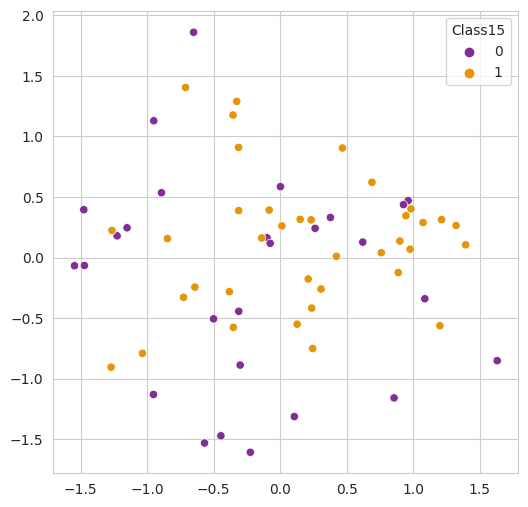

In [242]:
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x=training_samples_pca_x[:, 0], 
    y=training_samples_pca_x[:, 1], 
    hue=training_samples_before_selection_y.astype(int), 
    palette="CMRmap",
    legend='full'
);

In [255]:
scoring = {'accuracy': make_scorer(accuracy_score)}  
mlp = MLPClassifier(solver='lbfgs', random_state=0)    
result = cross_validate(estimator=mlp.fit(training_samples_pca_x, training_samples_before_selection_y),
                            X=training_samples_pca_x, y=training_samples_before_selection_y,
                            scoring=scoring, cv=StratifiedKFold(5), n_jobs=-1,
                            return_train_score=False)
print('Точность классификатора = {}%'.format(round(100 * np.mean(result['test_accuracy']), 2)))

Точность классификатора = 61.03%


In [240]:
training_samples_pca_x = pd.DataFrame(training_samples_pca_x, columns=pca_feature_names_short)
training_samples_pca_x.head(7)

,pca0,pca1
0,0.888718,-0.123238
1,1.323743,0.264944
2,0.237142,-0.416709
3,1.214391,0.314040
4,0.760980,0.040609
5,0.963010,0.470793
6,1.075255,0.289444


# Инициализация решающего алгоритма

Деревья решений (Decision Trees) — это непараметрический контролируемый метод обучения, используемый для классификации и регрессии. Цель состоит в том, чтобы создать модель, которая предсказывает значение целевой переменной, изучая простые правила принятия решений, выведенные из характеристик данных.

Для создания модели случайного леса вызываем модуль ensemble, затем через точку указываем название алгоритма RandomForestRegressor.

In [276]:
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Вызываем метод fit() у модели и передаем ему на вход два аргумента: таблицу входных признаков и столбец значений целевой переменной - (training_samples, training_target_variable)

In [277]:
decision_tree_model.fit(training_samples_after_selection_x, training_target_variable)

DecisionTreeClassifier()

In [279]:
 test_decision_tree = decision_tree_model.predict(training_samples_after_selection_x)
 test_decision_tree 

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

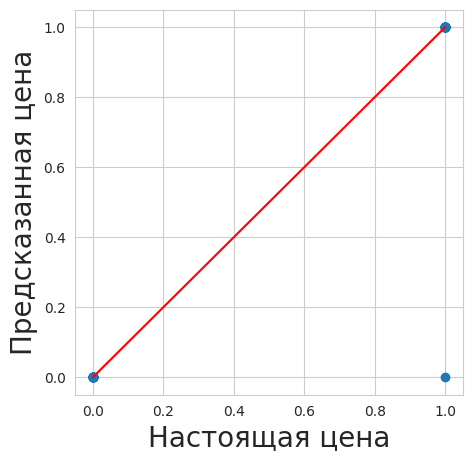

In [280]:
plt.figure(figsize=(5, 5))
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
plt.scatter(training_target_variable, test_decision_tree)
plt.plot([0, 1], [0, 1], 'r');